In [1]:
import os, sys
sys.path.append(os.path.join(os.path.abspath(''), '../'))

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from palettable.scientific.sequential import Oslo_5_r

from misc.normalization import (
    LogNormalizer,
    DummyNormalizer
)
from misc.Directory import getVkPredictRootDir

In [2]:
def plotHeatmapRow(measured, predicted, keys, row, tittle, axs, fig):
    for i, key in enumerate(keys):
        measured_log = np.log10(measured[key])
        predicted_log = np.log10(predicted[key])

        min_val = max(measured_log.min(), predicted_log.min())
        max_val = min(measured_log.max(), predicted_log.max())

        hist, xedges, yedges = np.histogram2d(measured_log, predicted_log, range=[[min_val, max_val], [min_val, max_val]], bins=[50,50])

        im = axs[row, i].imshow(hist.T, extent=[min_val, max_val, min_val, max_val], origin='lower', cmap=Oslo_5_r.mpl_colormap, norm=LogNorm())
        cbar = fig.colorbar(im, ax=axs[row, i])
        cbar.ax.tick_params(labelsize=14) 

        labels = ['10$^{-4}$', '10$^{-3}$', '10$^{-2}$']
        ticks = np.linspace(min_val, max_val, num=len(labels))
        axs[row, i].set_xticks(ticks)
        axs[row, i].set_yticks(ticks)
        axs[row, i].set_xticklabels(labels, fontsize=14)
        axs[row, i].set_yticklabels(labels, fontsize=14)

        axs[row, i].set_xlabel('Measured', fontsize=14)
        axs[row, i].set_ylabel('Predicted', fontsize=14)
        axs[row, i].set_title(f'{key} {tittle}', fontsize=16)

In [3]:
measured = {}
predicted = {}
measured_base = {}
predicted_base = {}

measured['RTX3060'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/3060_labels.npy')))
predicted['RTX3060'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/3060_preds.npy')))
measured_base['RTX3060'] = np.load(os.path.join(getVkPredictRootDir(),'validation/3060_base_labels.npy'))
predicted_base['RTX3060'] = np.load(os.path.join(getVkPredictRootDir(),'validation/3060_base_preds.npy'))
measured['RTX4060'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/4060_labels.npy')))
predicted['RTX4060'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/4060_preds.npy')))
measured_base['RTX4060'] = np.load(os.path.join(getVkPredictRootDir(),'validation/4060_base_labels.npy'))
predicted_base['RTX4060'] = np.load(os.path.join(getVkPredictRootDir(),'validation/4060_base_preds.npy'))
measured['GTX1660Ti'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/1660_labels.npy')))
predicted['GTX1660Ti'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/1660_preds.npy')))
measured_base['GTX1660Ti'] = np.load(os.path.join(getVkPredictRootDir(),'validation/1660_base_labels.npy'))
predicted_base['GTX1660Ti'] = np.load(os.path.join(getVkPredictRootDir(),'validation/1660_base_preds.npy'))
measured['RX6600XT'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/6600_labels.npy')))
predicted['RX6600XT'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/6600_preds.npy')))
measured_base['RX6600XT'] = np.load(os.path.join(getVkPredictRootDir(),'validation/6600_base_labels.npy'))
predicted_base['RX6600XT'] = np.load(os.path.join(getVkPredictRootDir(),'validation/6600_base_preds.npy'))
measured['UHD630'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/630_labels.npy')))
predicted['UHD630'] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(),'validation/630_preds.npy')))
measured_base['UHD630'] = np.load(os.path.join(getVkPredictRootDir(),'validation/630_base_labels.npy'))
predicted_base['UHD630'] = np.load(os.path.join(getVkPredictRootDir(),'validation/630_base_preds.npy')) 

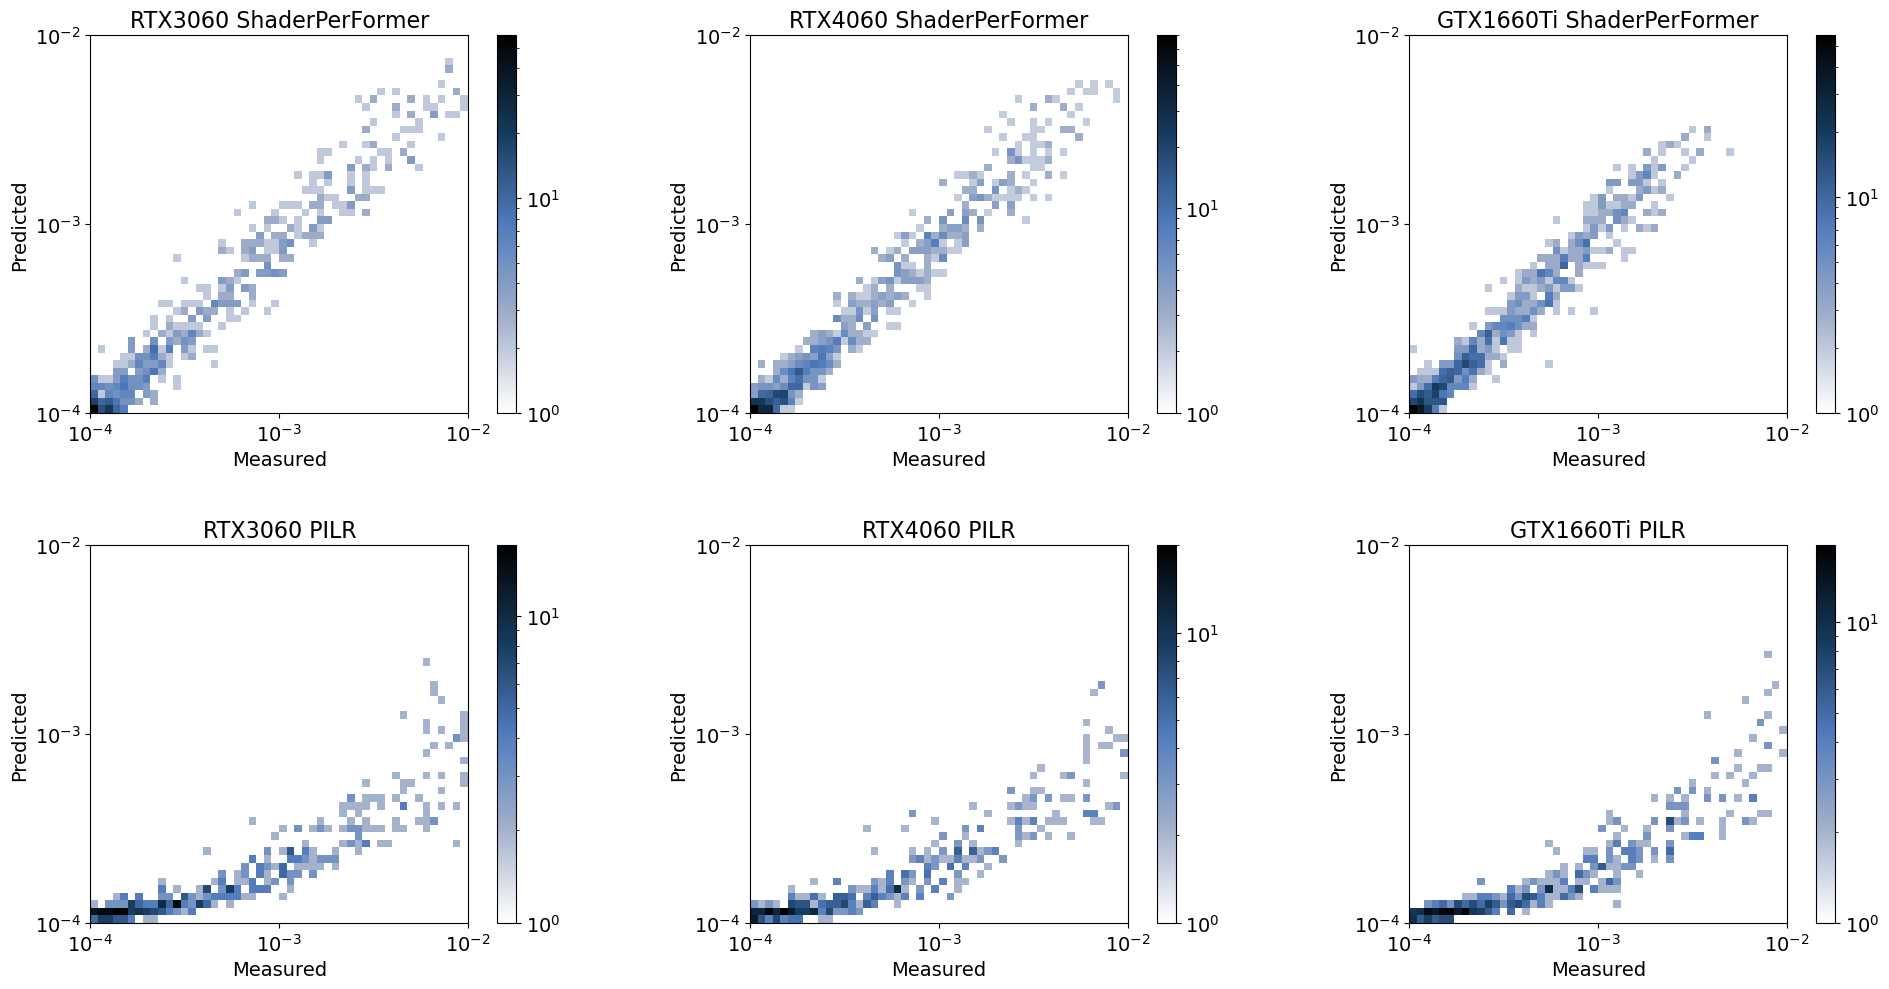

In [4]:
keys = ['RTX3060', 'RTX4060', 'GTX1660Ti']
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

plotHeatmapRow(measured, predicted, keys, 0, 'ShaderPerFormer', axs, fig)
plotHeatmapRow(measured_base, predicted_base, keys, 1, 'PILR', axs, fig)

plt.tight_layout()
plt.subplots_adjust(hspace=0.35)
plt.show()